In [7]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 69.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importações necessárias

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import unittest
import nltk
import string
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('rslp')
from nltk.stem import RSLPStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


## Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Carregando a base de dados (duas colunas, uma em pt e outra com sentenças em inglês)
df = pd.read_csv('/content/drive/My Drive/BoW/50phrases.csv')
df.head()

,English_Sentences,Portuguese_Sentences
0,I'm having trouble connecting to the Wi-Fi.,Não consigo acessar a minha conta online
1,I'm having trouble understanding the terms of ...,A cobertura do meu plano não é suficiente para...
2,I'm not happy with the speed of my mobile data.,Essa é a terceira vez que entro em contato por...
3,I'm having trouble connecting to my voicemail.,Vocês oferecem algum tipo de suporte técnico r...
4,The chatbot couldn't understand my question.,O atendimento foi muito rápido e eficiente.


In [4]:
stop_words_eng = set(stopwords.words('english')) # idioma em pt
stop_words_pt = set(stopwords.words('portuguese')) # idioma em inglês

## Funções

As funções abaixo são responsáveis por compôr o processo de pré-processamento, cada função realiza uma etapa diferente.

* **Remoção de pontuação (remove_punctuation)**: remove as pontuações do texto, tais como vírgula, ponto final, ponto de exclamação, ponto de interrogação...

* **Tokenização (tokenize)**: responsável por tokenizar o texto, ou seja, divide o texto em palavras.

* **Lematização (lemmatize)**: responsável por tornar as palavras na sua forma raíz, ou seja, na sua forma mais simples. Por exemplo, se há uma palavra como "corre", a lematização vai transformá-la em "correr".

* **Remoção de stopwords (remove_stopwords_txt)**: remove as palavras com menor insignificância, sempre sendo artigos como "a", "o", palavras como "e", "no"...

* **Pré-processamento (preprocess)**: responsável por aplicar todas as funções abordadas anteriormente para manipular o texto.


In [77]:
# função para remover pontuação
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# função de tokenização
def tokenize(text):
    return text.lower().split()

# função de lematização
def lemmatize(tokens, language='portuguese'):
    if language == 'english':
        lemmatizer = WordNetLemmatizer()
        return [lemmatizer.lemmatize(word) for word in tokens]
    elif language == 'portuguese':
        nlp = spacy.load('pt_core_news_sm')
        doc = nlp(' '.join(tokens))
        return [token.lemma_ for token in doc]

# função de remoção de stop words
def remove_stopwords_txt(tokens, language='portuguese'):
    if language == 'english':
        stop_words = set(stopwords.words('english'))
    elif language == 'portuguese':
        stop_words = set(stopwords.words('portuguese'))
    return [word for word in tokens if word not in stop_words]

# Função de pré-processamento - aplicação de todas as funções
def preprocess(text, remove_stopwords=False, language='portuguese'):
    text = remove_punctuation(text)
    tokens = tokenize(text)
    if remove_stopwords:
        tokens = remove_stopwords_txt(tokens, language)
    tokens = lemmatize(tokens, language)
    return ' '.join(tokens)

## Aplicação do Pré-processamento

In [78]:
# Pré-processamento das colunas com e sem remoção de stopwords para as sentenças em português e inglês
df['text_pt'] = df['Portuguese_Sentences'].apply(lambda x: preprocess(x, language='portuguese', remove_stopwords=False))
df['text_pt_without_sw'] = df['Portuguese_Sentences'].apply(lambda x: preprocess(x, language='portuguese', remove_stopwords=True))

df['text_eng'] = df['English_Sentences'].apply(lambda x: preprocess(x, language='english', remove_stopwords=False))
df['text_eng_without_sw'] = df['English_Sentences'].apply(lambda x: preprocess(x, language='english', remove_stopwords=True))

In [79]:
df

,English_Sentences,Portuguese_Sentences,text_pt,text_pt_without_sw,text_eng,text_eng_without_sw
0,I'm having trouble connecting to the Wi-Fi.,Não consigo acessar a minha conta online,não consigir acessar o meu conta onliner,consigo acessar conta onliner,im having trouble connecting to the wifi,im trouble connecting wifi
1,I'm having trouble understanding the terms of ...,A cobertura do meu plano não é suficiente para...,o cobertura de o meu plano não ser suficiente ...,cobertura plano suficiente necessidade,im having trouble understanding the term of my...,im trouble understanding term contract
2,I'm not happy with the speed of my mobile data.,Essa é a terceira vez que entro em contato por...,esse ser o terceiro vez que entro em contato p...,terceiro vez entro contato causa problema,im not happy with the speed of my mobile data,im happy speed mobile data
3,I'm having trouble connecting to my voicemail.,Vocês oferecem algum tipo de suporte técnico r...,você oferecer algum tipo de suporte técnico re...,oferecer algum tipo suporte técnico remoto,im having trouble connecting to my voicemail,im trouble connecting voicemail
4,The chatbot couldn't understand my question.,O atendimento foi muito rápido e eficiente.,o atendimento ser muito rápido e eficiente,atendimento rápido eficiente,the chatbot couldnt understand my question,chatbot couldnt understand question
5,I couldn't find the option I needed in the cha...,Tenho dificuldades em encontrar as informações...,ter dificuldade em encontrar o informação que ...,dificuldade encontrar informação preciso app,i couldnt find the option i needed in the chatbot,couldnt find option needed chatbot
6,I would prefer a more human-like interaction.,O técnico foi muito prestativo e resolveu o pr...,o técnico ser muito prestativo e resolver o pr...,técnico prestativo resolver problema rapidamente,i would prefer a more humanlike interaction,would prefer humanlike interaction
7,My bill is incorrect and I can't figure out why.,Recomendo a empresa para meus amigos e familia...,recomendar o empresa para meu amigo e familiar,recomer empresa amigo familiar,my bill is incorrect and i cant figure out why,bill incorrect cant figure
8,I'm not satisfied with the quality of your ser...,Há alguma promoção disponível no momento?,haver algum promoção disponível em o momento,algum promoção disponível momento,im not satisfied with the quality of your service,im satisfied quality service
9,I've had nothing but problems with your company.,A demora no atendimento é inadmissível.,o demor em o atendimento ser inadmissível,demor atendimento inadmissível,ive had nothing but problem with your company,ive nothing problem company


## Vetorização BoW

Bag of Words (BoW) é uma técnica que transforma textos em representações numéricas para entradas. Primeiramente inicia-se com a etapa de tokenização para então seguir com a construção do vocabulário.

* **Vocabulário**:
O BoW cria um vocabulário, ou seja, uma lista de todas as palavras únicas que aparecem em todo o conjunto de documentos. Se tiver duas frases como "eu gosto de maça e banana" e "eu gosto de morango", o vocabulário seria ["eu", "gosto", "de", "maça", "e", "banana", "morango"]

* **Contagem de frequência**:
Após montar o vocabulário, o BoW conta quantas vezes cada palavra aparece. Essas palavras então são usadas para construir o vetor de frequência para o corpus (documentos). Utilizando o exemplo anterior das frutas, seria:
  * Eu gosto de maça e banana: [1, 1, 1, 1, 1, 1, 0]
  * Eu gosto de morango: [1, 1, 1, 0, 0, 0, 1]

* **Representação vetorial**:
Cada documento é transformado em um vetor de números inteiros, o qual cada número representa a frequência da palavra.


* **Considerações importantes**:
"**CountVectorizer()**" é uma classe do scikit-learn que realiza a vetorização Bag of Words.

* "**fit_transform(df['text_pt'])**" aplica a vetorização na coluna text_pt do DataFrame, que contém as frases pré-processadas em português com stopwords.

* "**x_pt**", é uma matriz esparsa onde cada linha representa um documento e cada coluna representa uma palavra. Os valores são as frequências das palavras nos documentos.


In [86]:
# Aplicação da vetorização para o português com stopwords
vectorizer_pt = CountVectorizer()
x_pt = vectorizer_pt.fit_transform(df['text_pt'])

# Para o português sem stopwords
vectorizer_pt_no_stop = CountVectorizer()
x_pt_no_stop = vectorizer_pt_no_stop.fit_transform(df['text_pt_without_sw'])

print("Bag of Words para a coluna em português (com stopwords):")
print(vectorizer_pt.get_feature_names_out()) # retorna as palavras do vocabulário criado
print(x_pt.toarray())

print("\nBag of Words para a coluna em português (sem stopwords):")
print(vectorizer_pt_no_stop.get_feature_names_out())
print(x_pt_no_stop.toarray()) # converte a matriz esparsa em uma matriz densa

Bag of Words para a coluna em português (com stopwords):
['acessar' 'adicionar' 'agradável' 'algum' 'amigo' 'aplicativo' 'app'
 'atendente' 'atendimento' 'autoatendimento' 'base' 'causa' 'chat'
 'chatbot' 'cobertura' 'com' 'completo' 'conhecimento' 'conseguir'
 'consigir' 'conta' 'contato' 'de' 'demor' 'dever' 'dificuldade' 'difícil'
 'disponível' 'eficiente' 'ele' 'em' 'empresa' 'encontrar' 'entender'
 'entrar' 'entro' 'específico' 'esperar' 'esse' 'estar' 'familiar'
 'formal' 'funcionalidade' 'função' 'gosto' 'haver' 'hora' 'inadmissível'
 'informação' 'integrar' 'interface' 'intuitivo' 'linguagem' 'lugar'
 'mais' 'mesmo' 'meu' 'momento' 'muito' 'necessidade' 'novo' 'não'
 'oferecer' 'olho' 'onliner' 'opção' 'outro' 'para' 'personalizar'
 'personalização' 'planejar' 'plano' 'poder' 'por' 'precisar' 'preciso'
 'prefiro' 'prestativo' 'problema' 'promoção' 'qualidade' 'qualquer' 'que'
 'rapidamente' 'recomendar' 'recurso' 'remoto' 'resolver' 'rápido'
 'satisfeito' 'ser' 'serviço' 'simpl

In [83]:
# Para o inglês com stopwords
vectorizer_eng = CountVectorizer()
x_eng = vectorizer_eng.fit_transform(df['text_eng'])

# Para o inglês sem stopwords
vectorizer_eng_no_stop = CountVectorizer()
x_eng_no_stop = vectorizer_eng_no_stop.fit_transform(df['text_eng_without_sw'])

print("\nBag of Words para a coluna em inglês (com stopwords):")
print(vectorizer_en.get_feature_names_out()) # retorna as palavras do vocabulário criado
print(x_eng.toarray())

print("\nBag of Words para a coluna em inglês (sem stopwords):")
print(vectorizer_eng_no_stop.get_feature_names_out())
print(x_eng_no_stop.toarray()) # converte a matriz esparsa em uma matriz densa


Bag of Words para a coluna em inglês (com stopwords):
['able' 'about' 'abroad' 'and' 'answer' 'any' 'app' 'automatic' 'bad'
 'bill' 'but' 'cant' 'charge' 'chatbot' 'cheapest' 'company' 'comply'
 'concerned' 'connecting' 'contract' 'couldnt' 'currency' 'data'
 'difficult' 'exchange' 'experience' 'family' 'fee' 'figure' 'financially'
 'find' 'for' 'from' 'frustrated' 'had' 'happy' 'having' 'how' 'humanlike'
 'id' 'im' 'in' 'incorrect' 'information' 'interaction' 'internationally'
 'is' 'ive' 'know' 'like' 'long' 'making' 'me' 'mobile' 'money' 'more'
 'my' 'navigate' 'need' 'needed' 'not' 'nothing' 'of' 'online' 'option'
 'out' 'payment' 'prefer' 'problem' 'processing' 'protects' 'provide'
 'provided' 'quality' 'question' 'rate' 'regulation' 'restriction'
 'sanction' 'satisfied' 'security' 'send' 'sending' 'service' 'set'
 'speed' 'supporting' 'sure' 'taking' 'term' 'the' 'to' 'too' 'transfer'
 'trouble' 'trying' 'unable' 'understand' 'understanding' 'up' 'use'
 'using' 'violating' 'voic

## Gráfico com e sem stopwords

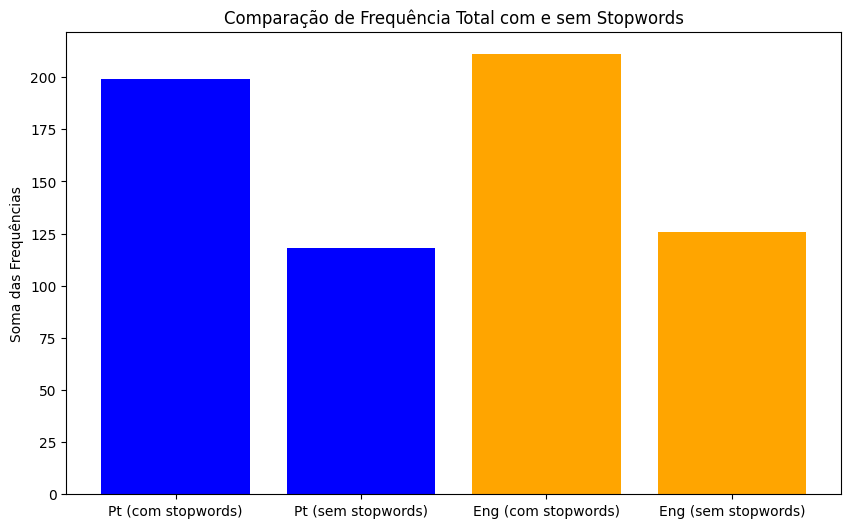

In [45]:
# Calcular a soma das frequências das palavras em cada caso
sum_pt = X_pt.sum()
sum_pt_no_stop = X_pt_no_stop.sum()
sum_en = X_en.sum()
sum_en_no_stop = X_en_no_stop.sum()

# Plotagem do gráfico
labels = ['Pt (com stopwords)', 'Pt (sem stopwords)',
          'Eng (com stopwords)', 'Eng (sem stopwords)']
values = [sum_pt, sum_pt_no_stop, sum_en, sum_en_no_stop]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'blue', 'orange', 'orange'])
plt.title('Comparação de Frequência Total com e sem Stopwords')
plt.ylabel('Soma das Frequências')
plt.show()

## Testes

In [75]:
class TestTextPreprocessing(unittest.TestCase):

    def test_remove_punctuation(self):
        self.assertEqual(remove_punctuation("Olá, estou com problema na minha operadora"), # comparação do esperado com obtido
                         "Olá estou com problema na minha operadora") # output esperado

    def test_tokenize_text(self):
        self.assertEqual(tokenize("Olá estou com problemas"), # comparação do esperado com obtido
         ["olá", "estou", "com", "problemas"]) # output esperado

    def test_remove_stopwords(self):
        tokens = ["i", "love", "my", "garden"]
        self.assertEqual(remove_stopwords_txt(tokens, 'english'),
         ["love", "garden"]) # output esperado

    def test_lemmatize_text_english(self):
        tokens = ["think", "so", "much"]
        self.assertEqual(lemmatize(tokens, 'english'),
                         ["think", "so", "much"]) # output esperado

    def test_preprocess(self):
        text = "running is good for your health."
        self.assertEqual(preprocess(text, remove_stopwords=True, language='english'),
                         "running good health") # output esperado

In [80]:
# Rodagem dos testes
if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)

test_lemmatization (__main__.TestPreprocessText) ... <ipython-input-28-e2f676272ef3>:41: DeprecationWarning: Please use assertEqual instead.
  self.assertEquals(result, expected_lemmatized)
ok
test_preprocess_text_english (__main__.TestPreprocessText) ... ok
test_preprocess_text_portuguese (__main__.TestPreprocessText) ... ok
test_tokenization (__main__.TestPreprocessText) ... <ipython-input-28-e2f676272ef3>:30: DeprecationWarning: Please use assertEqual instead.
  self.assertEquals(result, expected_tokens)
ok
test_lemmatize_text_english (__main__.TestTextPreprocessing) ... ok
test_preprocess (__main__.TestTextPreprocessing) ... ok
test_remove_punctuation (__main__.TestTextPreprocessing) ... ok
test_remove_stopwords (__main__.TestTextPreprocessing) ... ok
test_tokenize_text (__main__.TestTextPreprocessing) ... ok

----------------------------------------------------------------------
Ran 9 tests in 3.433s

OK


## Interpretação

A remoção de stopwords contribui para a redução do "ruído" no texto, ou seja, melhora a precisão de modelos que dependem de palavras frequentes como é o caso do BoW e sem as stopwords se tem um vetor menor. A inclusão de stop words pode levar a uma vetorização com muitos zeros, causando esparsidade. Por este motivo, no gráfico apresentado a barra com stopwords é maior do que a barra sem stopwords.